# Deep Learning

Regression

In [54]:
import pandas as pd

from sklearn.model_selection import train_test_split

# from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('insurance.csv') #load the dataset
print(df.shape)
df.head(3)

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,southwest,16884.9240
1,18,0,33.77,1,0,southeast,1725.5523
2,28,0,33.00,3,0,southeast,4449.4620


In [32]:
# inspect categorical features
df.region.unique()

array(['southwest', 'southeast', '0rthwest', '0rtheast'], dtype=object)

In [33]:
# clean categorical features
df.region = df.region.replace('0', 'no', regex=True)
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [34]:
# Define X and y
X = df.iloc[:,0:6]
y = df.iloc[:,-1]

In [35]:
# one-hot encoding for categorical variables
X = pd.get_dummies(X) 
X.head(2)

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.90,0,1,0,0,0,1
1,18,0,33.77,1,0,0,0,1,0


In [36]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [37]:
# standardize
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Function For Designing Model
Function that creates and returns your Keras sequential model (To use in skires wrappers)

In [38]:
def design_model(features):
  # ann model instance  
  model_regr = Sequential()
  
  
  #### INPUT LAYER>>>>
  #adding the input layer
  model_regr.add(Dense(units = X.shape[1] , activation = 'relu')) 


  #### HIDDEN LAYER1>>>>
  # there are a numbers of activation functions such as softmax, sigmoid, 
  # but ReLU (relu) (Rectified Linear Unit) is very effective in many applications and we’ll use it here.
  model_regr.add(Dense(128, activation = 'relu'))


  #### OUTPUT LAYER>>>>
  model_regr.add(Dense(1, activation = 'linear'))  


  #### Optimizer
  # WE have a lot of optimizers such as SGD (Stochastic Gradient Descent optimizer), Adam, RMSprop, and others.
  # right now adam is the best one as its solved previous optmizers issues.
  opt = Adam(learning_rate = 0.01)
  # loss/cost 
  # MSE, MAE, Huber loss  
  model_regr.compile(loss='mse',  metrics=['mae'], optimizer=opt)  
    

  return model_regr

#### Invoke The Function For Our Model Design

In [39]:
model_regr = design_model(x_train)

#### Training Phase

In [40]:
# reference https://keras.io/api/callbacks/early_stopping/
# add early stoping when theres no improvement
stop = EarlyStopping(monitor='val_loss', 
                     mode='min', 
                     patience=30,
                     verbose=1)

In [41]:
# create a variable to store our fitted model
h = model_regr.fit(x_train, y_train, 
               validation_split=0.2, 
               epochs=500, 
               batch_size=10,
               verbose=1,
               callbacks=[stop])

Epoch 1/500
81/81 [==============================] - 0s 3ms/step - loss: 310653056.0000 - mae: 13067.5938 - val_loss: 266910624.0000 - val_mae: 11329.7715
Epoch 2/500
81/81 [==============================] - 0s 1ms/step - loss: 160687360.0000 - mae: 8397.3076 - val_loss: 64422396.0000 - val_mae: 5068.0166
Epoch 3/500
81/81 [==============================] - 0s 1ms/step - loss: 43585836.0000 - mae: 4704.5142 - val_loss: 37309512.0000 - val_mae: 3989.5874
Epoch 4/500
81/81 [==============================] - 0s 1ms/step - loss: 36188488.0000 - mae: 4211.0400 - val_loss: 36425600.0000 - val_mae: 3828.1814
Epoch 5/500
81/81 [==============================] - 0s 1ms/step - loss: 35034212.0000 - mae: 4047.9062 - val_loss: 33266694.0000 - val_mae: 3791.9265
Epoch 6/500
81/81 [==============================] - 0s 1ms/step - loss: 34717428.0000 - mae: 4057.4575 - val_loss: 33397666.0000 - val_mae: 3755.0498
Epoch 7/500
81/81 [==============================] - 0s 1ms/step - loss: 34269376.0000 - 

Epoch 55/500
81/81 [==============================] - 0s 1ms/step - loss: 24219022.0000 - mae: 2879.1755 - val_loss: 22708292.0000 - val_mae: 2982.3152
Epoch 56/500
81/81 [==============================] - 0s 1ms/step - loss: 24273452.0000 - mae: 2979.9373 - val_loss: 22820950.0000 - val_mae: 2907.1316
Epoch 57/500
81/81 [==============================] - 0s 1ms/step - loss: 24291910.0000 - mae: 2982.5398 - val_loss: 23220048.0000 - val_mae: 2760.4883
Epoch 58/500
81/81 [==============================] - 0s 1ms/step - loss: 24249142.0000 - mae: 2885.1782 - val_loss: 22518158.0000 - val_mae: 3000.8943
Epoch 59/500
81/81 [==============================] - 0s 1ms/step - loss: 24109248.0000 - mae: 2869.6680 - val_loss: 22552772.0000 - val_mae: 2874.1458
Epoch 60/500
81/81 [==============================] - 0s 1ms/step - loss: 24157922.0000 - mae: 2898.3560 - val_loss: 22672850.0000 - val_mae: 2933.4478
Epoch 61/500
81/81 [==============================] - 0s 1ms/step - loss: 24212472.0000 

Epoch 109/500
81/81 [==============================] - 0s 1ms/step - loss: 22999384.0000 - mae: 2812.6145 - val_loss: 23946750.0000 - val_mae: 2570.6758
Epoch 110/500
81/81 [==============================] - 0s 1ms/step - loss: 23360658.0000 - mae: 2794.5786 - val_loss: 22881930.0000 - val_mae: 2786.6987
Epoch 111/500
81/81 [==============================] - 0s 1ms/step - loss: 22901898.0000 - mae: 2851.9368 - val_loss: 22781092.0000 - val_mae: 2746.0303
Epoch 112/500
81/81 [==============================] - 0s 1ms/step - loss: 22982812.0000 - mae: 2807.5144 - val_loss: 22194640.0000 - val_mae: 2721.7522
Epoch 113/500
81/81 [==============================] - 0s 1ms/step - loss: 22835314.0000 - mae: 2827.1653 - val_loss: 21904852.0000 - val_mae: 2813.4849
Epoch 114/500
81/81 [==============================] - 0s 1ms/step - loss: 22871290.0000 - mae: 2755.1277 - val_loss: 22257178.0000 - val_mae: 2794.4502
Epoch 115/500
81/81 [==============================] - 0s 1ms/step - loss: 2290559

81/81 [==============================] - 0s 1ms/step - loss: 22002456.0000 - mae: 2676.9675 - val_loss: 22196940.0000 - val_mae: 2751.7021
Epoch 163/500
81/81 [==============================] - 0s 1ms/step - loss: 21806634.0000 - mae: 2755.9080 - val_loss: 21696466.0000 - val_mae: 2821.7996
Epoch 164/500
81/81 [==============================] - 0s 1ms/step - loss: 21910922.0000 - mae: 2765.2085 - val_loss: 22724378.0000 - val_mae: 2669.6497
Epoch 165/500
81/81 [==============================] - 0s 1ms/step - loss: 21823020.0000 - mae: 2702.8772 - val_loss: 22322016.0000 - val_mae: 2805.4502
Epoch 166/500
81/81 [==============================] - 0s 1ms/step - loss: 21754800.0000 - mae: 2807.1416 - val_loss: 21985910.0000 - val_mae: 2820.9590
Epoch 167/500
81/81 [==============================] - 0s 1ms/step - loss: 21689410.0000 - mae: 2792.6880 - val_loss: 22017916.0000 - val_mae: 2667.3667
Epoch 168/500
81/81 [==============================] - 0s 1ms/step - loss: 21692710.0000 - mae: 

#### Model Summary

In [42]:
# check layer
# model_regr.layers
# view summary
model_regr.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 9)                 90        
                                                                 
 dense_4 (Dense)             (None, 128)               1280      
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,499
Trainable params: 1,499
Non-trainable params: 0
_________________________________________________________________


In [43]:
h.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

Text(0, 0.5, 'MAE')

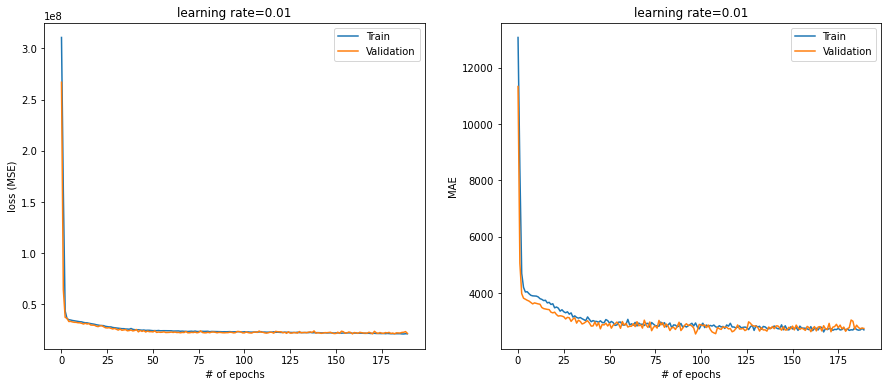

In [44]:
#plotting

fig, axs = plt.subplots(1,2,
                        figsize=(15, 6),
                        gridspec_kw={'hspace': 0.5, 'wspace': 0.2}) 
(ax1, ax2) = axs
ax1.plot(h.history['loss'], label='Train')
ax1.plot(h.history['val_loss'], label='Validation')
ax1.set_title('learning rate=' + str(0.01))
ax1.legend(loc="upper right")
ax1.set_xlabel("# of epochs")
ax1.set_ylabel("loss (MSE)")

ax2.plot(h.history['mae'], label='Train')
ax2.plot(h.history['val_mae'], label='Validation')
ax2.set_title('learning rate=' + str(0.01))
ax2.legend(loc="upper right")
ax2.set_xlabel("# of epochs")
ax2.set_ylabel("MAE")

#### Evaluation

In [45]:
val_mse, val_mae = model_regr.evaluate(x_test, y_test, verbose = 1)

11/11 [==============================] - 0s 900us/step - loss: 21941794.0000 - mae: 2752.9785


# GridSearchCV

In [47]:
model = KerasRegressor(model = model_regr)

In [49]:
# This is computational extensive, we will use small value here
param_grid = dict(epochs = [50,100],
                  batch_size = [1,10,50])

In [57]:
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    n_jobs=-1, # use all processor cores of our machine (faster!!)
                    scoring = 'r2',
                    return_train_score = True,
                    cv=3)

grid_result = grid.fit(x_train, y_train)

INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmpd_rdpxw_\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmp5nzv7vbz\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmptr6y61lh\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmpfba5rgtq\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmpx5tvlo1x\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmpe6dxjy_7\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmpr3rqqfu6\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmpqon32wev\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmphlobkbqn\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmp8mlv7z05\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmpw5xpspih\assets
INFO:tensorflow:Assets written to: C:\Users

21/21 [==============================] - 0s 950us/step - loss: 20402836.0000 - mae: 2596.9485
Epoch 47/50
21/21 [==============================] - 0s 950us/step - loss: 20636266.0000 - mae: 2821.5801
Epoch 48/50
21/21 [==============================] - 0s 950us/step - loss: 20544186.0000 - mae: 2683.2930
Epoch 49/50
21/21 [==============================] - 0s 950us/step - loss: 20489980.0000 - mae: 2738.8430
Epoch 50/50
21/21 [==============================] - 0s 950us/step - loss: 20491366.0000 - mae: 2714.2061


In [56]:
grid_result.best_score_ , grid_result.best_params_

(-23227804.7176768, {'batch_size': 50, 'epochs': 50})

### Summary


1. Preparing the data for learning:
2. separating features from labels using array slicing
3. determining the shape of your data
4. preprocessing the categorical variables using one-hot encoding
5. splitting the data into training and test sets
6. scaling the numerical features
7. Designing a Sequential model by chaining InputLayer() and the tf.keras.layers.Dense layers. InputLayer() was used as a placeholder for the input data. The output layer in this case needed one neuron since we need a prediction of a single value in the regression. And finally, hidden layers were added with the relu activation function to handle complex dependencies in the data.
8. Choosing an optimizer using keras.optimizers with a specific learning rate hyperparameter.
9. Training the model - using model.fit() to train the model on the training data and training labels.
10. Setting the values for the learning hyperparameters: number of epochs and batch sizes.
11. Evaluating the model using model.evaluate() on the test data.
